In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# 🔹 Simulation des préférences utilisateurs et caractéristiques des objets
users = ["Ameth", "Fatou", "Modou"]
items = ["Film1", "Film2", "Film3", "Film4"]

PU = np.array([[0.6, 0.3, 0.1], [0.2, 0.7, 0.1], [0.1, 0.1, 0.8]])  # Utilisateurs
PO = np.array([[0.5, 0.3, 0.2], [0.1, 0.8, 0.1], [0.3, 0.2, 0.5], [0.2, 0.6, 0.2]])  # Objets

In [13]:
# Fonction pour calculer l'information mutuelle


def mutual_information(pu, po):
    pu = pu[:, np.newaxis]  # Transformer en matrice colonne (2D)
    po = po[np.newaxis, :]  # Transformer en matrice ligne (2D)

    joint_prob = pu * po  # Produit matriciel
    marginal_u = np.sum(joint_prob, axis=1, keepdims=True)
    marginal_o = np.sum(joint_prob, axis=0, keepdims=True)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        mi_matrix = joint_prob * np.log(joint_prob / (marginal_u * marginal_o))
        mi_matrix = np.nan_to_num(mi_matrix)  # Gérer les NaN
        
    return np.sum(mi_matrix)

# 🔹 Fonction Similarité Cosinus
cosine_scores = cosine_similarity(PU, PO)

In [14]:

# 🔹 Calcul des scores d'information mutuelle
mi_scores = np.array([[mutual_information(PU[u], PO[o]) for o in range(len(items))] for u in range(len(users))])


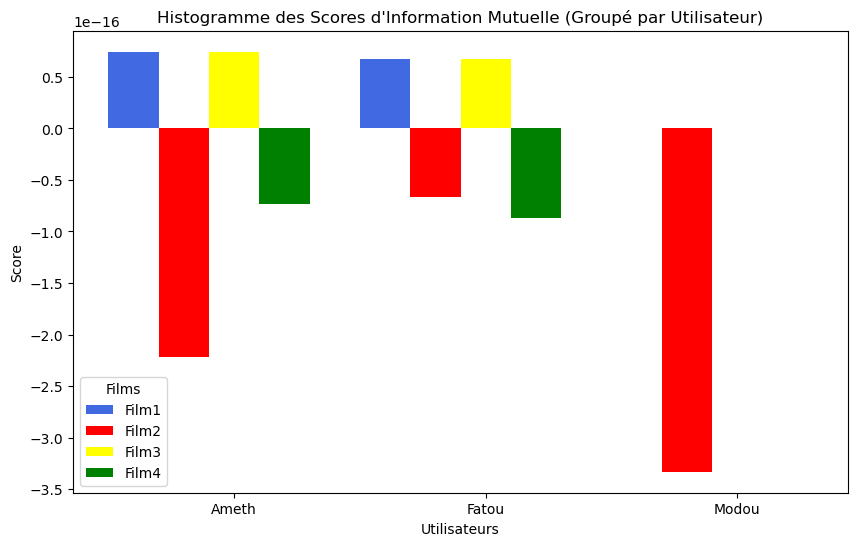

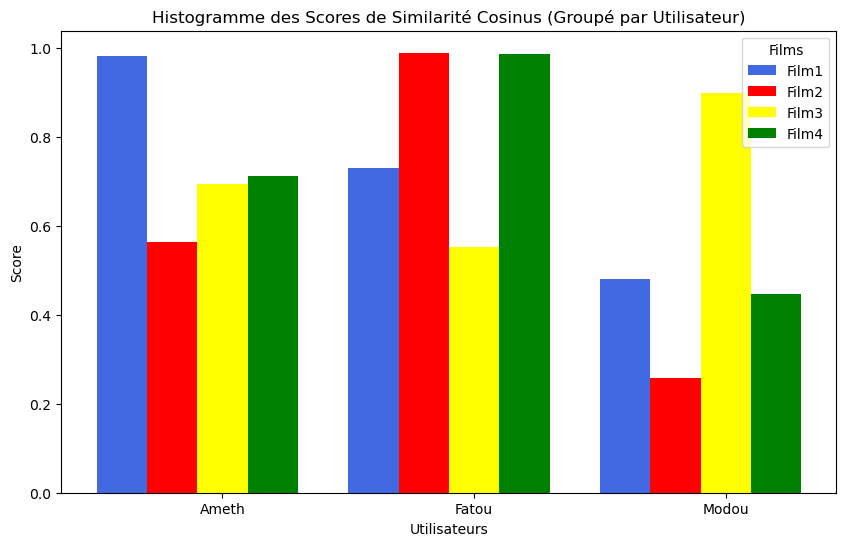

/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.draw()
/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


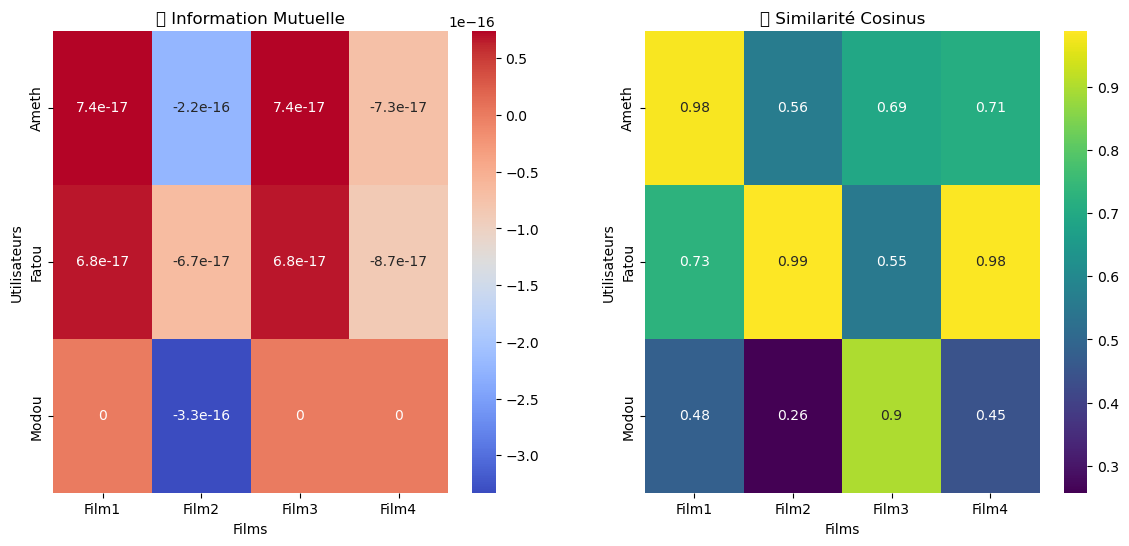

/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


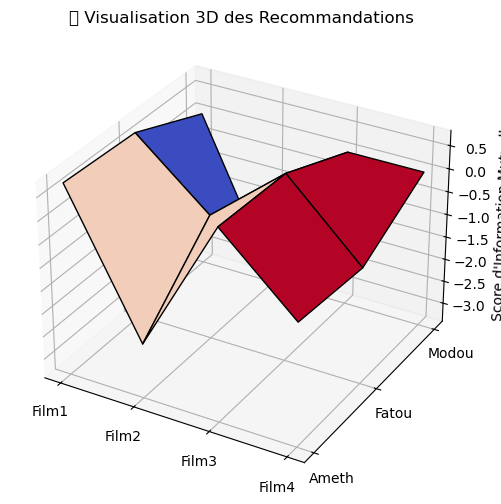

🎯 Recommandations basées sur l'Information Mutuelle
Ameth : ['Film3', 'Film1', 'Film4', 'Film2']
Fatou : ['Film1', 'Film3', 'Film2', 'Film4']
Modou : ['Film1', 'Film3', 'Film4', 'Film2']

🎯 Recommandations basées sur la Similarité Cosinus
Ameth : ['Film1', 'Film4', 'Film3', 'Film2']
Fatou : ['Film2', 'Film4', 'Film1', 'Film3']
Modou : ['Film3', 'Film1', 'Film4', 'Film2']


In [18]:





# Définition des couleurs pour chaque film
colors = ["royalblue", "red", "yellow", "green"]

# 🔹 Fonction pour générer un histogramme groupé
def plot_grouped_histogram(scores, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    indices = np.arange(len(users))

    for i, film in enumerate(items):
        ax.bar(indices + i * bar_width, scores[:, i], bar_width, label=film, color=colors[i])

    ax.set_xlabel("Utilisateurs")
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.set_xticks(indices + bar_width * (len(items) / 2))
    ax.set_xticklabels(users)
    ax.legend(title="Films")

    plt.show()

# 🔹 Affichage des histogrammes
plot_grouped_histogram(mi_scores, "Histogramme des Scores d'Information Mutuelle (Groupé par Utilisateur)")
plot_grouped_histogram(cosine_scores, "Histogramme des Scores de Similarité Cosinus (Groupé par Utilisateur)")

# 🔹 Heatmap de comparaison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(mi_scores, annot=True, cmap="coolwarm", xticklabels=items, yticklabels=users, ax=axes[0])
axes[0].set_title("🔹 Information Mutuelle")
axes[0].set_xlabel("Films")
axes[0].set_ylabel("Utilisateurs")

sns.heatmap(cosine_scores, annot=True, cmap="viridis", xticklabels=items, yticklabels=users, ax=axes[1])
axes[1].set_title("🔹 Similarité Cosinus")
axes[1].set_xlabel("Films")
axes[1].set_ylabel("Utilisateurs")

plt.show()

# 🔹 Représentation 3D des Relations
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(range(len(items)), range(len(users)))
Z = mi_scores  # Utiliser les scores d'information mutuelle

ax.plot_surface(X, Y, Z, cmap="coolwarm", edgecolor='k')
ax.set_xticks(range(len(items)))
ax.set_xticklabels(items)
ax.set_yticks(range(len(users)))
ax.set_yticklabels(users)
ax.set_zlabel("Score d'Information Mutuelle")
ax.set_title("🔹 Visualisation 3D des Recommandations")

plt.show()

# 🔹 Génération des recommandations
mi_recommendations = {users[u]: [items[i] for i in np.argsort(-mi_scores[u])] for u in range(len(users))}
cosine_recommendations = {users[u]: [items[i] for i in np.argsort(-cosine_scores[u])] for u in range(len(users))}

# 🔹 Affichage des résultats
print("🎯 Recommandations basées sur l'Information Mutuelle")
for user, recs in mi_recommendations.items():
    print(f"{user} : {recs}")

print("\n🎯 Recommandations basées sur la Similarité Cosinus")
for user, recs in cosine_recommendations.items():
    print(f"{user} : {recs}")


In [16]:

# 🔹 Génération des recommandations
mi_recommendations = {users[u]: [items[i] for i in np.argsort(-mi_scores[u])] for u in range(len(users))}
cosine_recommendations = {users[u]: [items[i] for i in np.argsort(-cosine_scores[u])] for u in range(len(users))}


In [17]:
# 🔹 Affichage des résultats
print("🎯 Recommandations basées sur l'Information Mutuelle")
for user, recs in mi_recommendations.items():
    print(f"{user} : {recs}")

print("\n🎯 Recommandations basées sur la Similarité Cosinus")
for user, recs in cosine_recommendations.items():
    print(f"{user} : {recs}")
    

🎯 Recommandations basées sur l'Information Mutuelle
Ameth : ['Film3', 'Film1', 'Film4', 'Film2']
Fatou : ['Film1', 'Film3', 'Film2', 'Film4']
Modou : ['Film1', 'Film3', 'Film4', 'Film2']

🎯 Recommandations basées sur la Similarité Cosinus
Ameth : ['Film1', 'Film4', 'Film3', 'Film2']
Fatou : ['Film2', 'Film4', 'Film1', 'Film3']
Modou : ['Film3', 'Film1', 'Film4', 'Film2']
